## EDA - Brasileirão Pontos Corridos (2003 - 2024)


# Objetivo

Essa análise tem como objetivo obter mais detalhes e conhecer mais os dados do Campeonato Brasileiro de Futebol desde que passou a ser disputado no formato de pontos corridos, em 2003, até a última edição concluída, em 2024. Alguns dos objetivos são:

Identificar os times que participaram do campeonato e as quantidades de participações.

Gerar as tabelas de cada edição.

Identificar a quantidade de títulos e rebaixamentos dos times. 

Ver as participações dos clubes no Brasileirão por estado e por região.

Ver artilheiros em geral e por edição de 2014 a 2024 (quando se tem dados).

# Bibliotecas necessárias

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Times e quantidades de participações

In [43]:
df = pd.read_csv(r"archive/campeonato-brasileiro-full.csv", sep=',')
df.head()

times = {}
for index, row in df.iterrows():
    if row['rodata'] == 1:
        if row['mandante'] in times:
            times[row['mandante']] += 1
        else:
            times[row['mandante']] = 1
        if row['visitante'] in times:
            times[row['visitante']] += 1
        else:
            times[row['visitante']] = 1

times = dict(sorted(times.items(), key = lambda x : x[1], reverse = True))

print(f'Ao todo, {len(times)} times participaram do Brasileirão de 2003 a 2024.')
for time in times:
    print(f'{time} tem {times[time]} participações.')

Ao todo, 45 times participaram do Brasileirão de 2003 a 2024.
Flamengo tem 22 participações.
Fluminense tem 22 participações.
Sao Paulo tem 22 participações.
Athletico-PR tem 21 participações.
Internacional tem 21 participações.
Santos tem 21 participações.
Corinthians tem 21 participações.
Atletico-MG tem 21 participações.
Gremio tem 20 participações.
Palmeiras tem 20 participações.
Cruzeiro tem 19 participações.
Botafogo-RJ tem 19 participações.
Vasco tem 17 participações.
Coritiba tem 15 participações.
Goias tem 15 participações.
Bahia tem 12 participações.
Vitoria tem 11 participações.
Figueirense tem 11 participações.
Sport tem 11 participações.
Ponte Preta tem 9 participações.
Fortaleza tem 9 participações.
Juventude tem 8 participações.
Atletico-GO tem 8 participações.
Avai tem 7 participações.
Ceara tem 7 participações.
Chapecoense tem 7 participações.
Parana tem 6 participações.
America-MG tem 6 participações.
Criciuma tem 5 participações.
Nautico tem 5 participações.
Braganti

# Construindo a tabela para cada ano

In [44]:
#Observação: as tabelas não estarão 100% corretas devido a punições aos clubes, já que o cálculo é feito apenas com base nas partidas.
#Inseri apenas a punição a Flamengo e Portuguesa em 2013, que alterou um dos clubes rebaixados daquela edição.

# Criando a coluna ano para facilitar
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
df['edicao'] = df['data'].dt.year.astype(str)
df.loc[(df['edicao'] == '2021') & (df['data'].dt.month <= 2), 'edicao'] = '2020'
df.head()

# Dividindo df em anos
anos = range(2003, 2025)
partidas_por_ano = {ano: df[df['edicao'] == str(ano)] for ano in anos}

tabelas_por_ano = {}
for edicao in anos:
    resultados_ano = {}
    partidas = partidas_por_ano[edicao]
    times_ano = set(partidas['mandante'])
    for time in times_ano:
        resultados_ano[time] = {
            'pontos': 0,
            'jogos': 0,
            'vitorias': 0,
            'empates': 0,
            'derrotas': 0,
            'gols_pro': 0,
            'gols_contra': 0,
            'saldo': 0,
            'aprov': 0,
            'aprov_mandante': 0,
            'aprov_visitante': 0
        }
    for _, row in partidas.iterrows():
        mandante = row['mandante']
        visitante = row['visitante']
        mandante_placar = row['mandante_Placar']
        visitante_placar = row['visitante_Placar']
        vencedor = row['vencedor']
        
        #mandante
        resultados_ano[mandante]['jogos'] += 1
        resultados_ano[mandante]['gols_pro'] += mandante_placar
        resultados_ano[mandante]['gols_contra'] += visitante_placar
        if mandante == vencedor:
            resultados_ano[mandante]['pontos'] += 3
            resultados_ano[mandante]['vitorias'] += 1
            resultados_ano[mandante]['aprov_mandante'] += 3
        elif vencedor == '-':
            resultados_ano[mandante]['pontos'] += 1
            resultados_ano[mandante]['empates'] += 1
            resultados_ano[mandante]['aprov_mandante'] += 1
        else:
            resultados_ano[mandante]['derrotas'] += 1
        
        #visitante
        resultados_ano[visitante]['jogos'] += 1
        resultados_ano[visitante]['gols_pro'] += visitante_placar
        resultados_ano[visitante]['gols_contra'] += mandante_placar
        if visitante == vencedor:
            resultados_ano[visitante]['pontos'] += 3
            resultados_ano[visitante]['vitorias'] += 1
            resultados_ano[visitante]['aprov_visitante'] += 3
        elif vencedor == '-':
            resultados_ano[visitante]['pontos'] += 1
            resultados_ano[visitante]['empates'] += 1
            resultados_ano[visitante]['aprov_visitante'] += 1
        else:
            resultados_ano[visitante]['derrotas'] += 1
       
    for time, stats in resultados_ano.items():
        stats['saldo'] = stats['gols_pro'] - stats['gols_contra']
        stats['aprov'] = stats['pontos'] / (stats['jogos'] * 3) 
        stats['aprov_mandante'] = stats['aprov_mandante'] / (19 * 3)
        stats['aprov_visitante'] = stats['aprov_visitante'] / (19 * 3)
    
    #deducao de pontos que esses times tiveram em 2013
    if edicao == 2013:
        if 'Flamengo' in resultados_ano:
            resultados_ano['Flamengo']['pontos'] -= 4
        if 'Portuguesa' in resultados_ano:
            resultados_ano['Portuguesa']['pontos'] -= 4

    tabelas_por_ano[edicao] = resultados_ano

resultados_ano

for edicao in tabelas_por_ano:
    print(f"Tabela do Brasileirão {edicao}")
    df_tabela = pd.DataFrame.from_dict(tabelas_por_ano[edicao], orient='index')
    df_tabela = df_tabela.sort_values(by=['pontos', 'vitorias', 'saldo'], ascending=False)
    df_tabela['posicao'] = range(1, len(df_tabela) + 1) 
    cols = ['posicao'] + [col for col in df_tabela.columns if col != 'posicao']
    df_tabela = df_tabela[cols]
    display(df_tabela)

Tabela do Brasileirão 2003


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Cruzeiro,1,100,46,31,7,8,102,47,55,0.724638,0.982456,0.771930
Santos,2,87,46,25,12,9,93,60,33,0.630435,0.894737,0.631579
Sao Paulo,3,78,46,22,12,12,81,67,14,0.565217,0.771930,0.596491
Coritiba,4,73,46,21,10,15,67,58,9,0.528986,0.824561,0.456140
Atletico-MG,5,72,46,19,15,12,76,62,14,0.521739,0.771930,0.491228
Sao Caetano,6,71,46,19,14,13,53,37,16,0.514493,0.877193,0.368421
Internacional,7,70,46,20,10,16,59,57,2,0.507246,0.807018,0.421053
Flamengo,8,66,46,18,12,16,66,73,-7,0.478261,0.824561,0.333333
Goias,9,65,46,18,11,17,78,63,15,0.471014,0.754386,0.385965
Parana,10,65,46,18,11,17,85,75,10,0.471014,0.789474,0.350877


Tabela do Brasileirão 2004


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Santos,1,89,46,27,8,11,103,58,45,0.644928,0.982456,0.578947
Athletico-PR,2,86,46,25,11,10,93,56,37,0.623188,0.929825,0.578947
Sao Paulo,3,82,46,24,10,12,78,43,35,0.594203,0.982456,0.456140
Palmeiras,4,79,46,22,13,11,72,47,25,0.572464,0.719298,0.666667
Sao Caetano,5,77,46,23,8,15,65,49,16,0.557971,0.842105,0.508772
Corinthians,6,74,46,20,14,12,54,54,0,0.536232,0.754386,0.543860
Goias,7,72,46,21,9,16,81,68,13,0.521739,0.929825,0.333333
Juventude,8,70,46,20,10,16,60,66,-6,0.507246,0.649123,0.578947
Internacional,9,67,46,20,7,19,65,58,7,0.485507,0.859649,0.315789
Fluminense,10,67,46,18,13,15,65,68,-3,0.485507,0.754386,0.421053


Tabela do Brasileirão 2005


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Corinthians,1,81,42,24,9,9,87,59,28,0.642857,0.736842,0.684211
Internacional,2,78,42,23,9,10,72,49,23,0.619048,0.789474,0.578947
Goias,3,74,42,22,8,12,68,51,17,0.587302,0.789474,0.508772
Palmeiras,4,70,42,20,10,12,81,65,16,0.555556,0.807018,0.421053
Fluminense,5,68,42,19,11,12,79,70,9,0.539683,0.649123,0.543860
Athletico-PR,6,61,42,18,7,17,76,67,9,0.484127,0.771930,0.298246
Parana,7,61,42,17,10,15,59,51,8,0.484127,0.649123,0.421053
Cruzeiro,8,60,42,17,9,16,73,72,1,0.476190,0.649123,0.403509
Botafogo-RJ,9,59,42,17,8,17,57,56,1,0.468254,0.701754,0.333333
Santos,10,59,42,16,11,15,68,71,-3,0.468254,0.596491,0.438596


Tabela do Brasileirão 2006


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Sao Paulo,1,78,38,22,12,4,66,32,34,0.684211,0.807018,0.561404
Internacional,2,69,38,20,9,9,52,36,16,0.605263,0.631579,0.578947
Gremio,3,67,38,20,7,11,64,45,19,0.587719,0.736842,0.438596
Santos,4,64,38,18,10,10,58,36,22,0.561404,0.824561,0.298246
Parana,5,60,38,18,6,14,56,49,7,0.526316,0.701754,0.350877
Vasco,6,59,38,15,14,9,57,50,7,0.517544,0.578947,0.456140
Figueirense,7,57,38,15,12,11,52,44,8,0.500000,0.596491,0.403509
Goias,8,55,38,15,10,13,63,49,14,0.482456,0.561404,0.403509
Corinthians,9,53,38,15,8,15,41,46,-5,0.464912,0.526316,0.403509
Cruzeiro,10,53,38,14,11,13,52,45,7,0.464912,0.666667,0.263158


Tabela do Brasileirão 2007


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Sao Paulo,1,77,38,23,8,7,55,19,36,0.675439,0.736842,0.614035
Santos,2,62,38,19,5,14,57,47,10,0.543860,0.649123,0.438596
Flamengo,3,61,38,17,10,11,55,49,6,0.535088,0.701754,0.368421
Fluminense,4,61,38,16,13,9,57,39,18,0.535088,0.561404,0.508772
Cruzeiro,5,60,38,18,6,14,73,58,15,0.526316,0.614035,0.438596
Gremio,6,58,38,17,7,14,44,43,1,0.508772,0.701754,0.315789
Palmeiras,7,58,38,16,10,12,48,47,1,0.508772,0.578947,0.438596
Atletico-MG,8,55,38,15,10,13,63,51,12,0.482456,0.561404,0.403509
Botafogo-RJ,9,55,38,14,13,11,62,58,4,0.482456,0.596491,0.368421
Vasco,10,54,38,15,9,14,58,47,11,0.473684,0.631579,0.315789


Tabela do Brasileirão 2008


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Sao Paulo,1,75,38,21,12,5,66,36,30,0.657895,0.807018,0.508772
Gremio,2,72,38,21,9,8,59,35,24,0.631579,0.807018,0.456140
Cruzeiro,3,67,38,21,4,13,59,44,15,0.587719,0.824561,0.350877
Palmeiras,4,65,38,19,8,11,55,45,10,0.570175,0.771930,0.368421
Flamengo,5,64,38,18,10,10,67,48,19,0.561404,0.649123,0.473684
Internacional,6,54,38,15,9,14,48,47,1,0.473684,0.754386,0.192982
Botafogo-RJ,7,53,38,15,8,15,51,44,7,0.464912,0.543860,0.385965
Goias,8,53,38,14,11,13,57,47,10,0.464912,0.649123,0.280702
Coritiba,9,53,38,14,11,13,55,48,7,0.464912,0.631579,0.298246
Vitoria,10,52,38,15,7,16,48,44,4,0.456140,0.666667,0.245614


Tabela do Brasileirão 2009


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Flamengo,1,67,38,19,10,9,58,44,14,0.587719,0.701754,0.473684
Internacional,2,65,38,19,8,11,65,44,21,0.570175,0.701754,0.438596
Sao Paulo,3,65,38,18,11,9,57,42,15,0.570175,0.736842,0.403509
Cruzeiro,4,62,38,18,8,12,58,53,5,0.543860,0.526316,0.561404
Palmeiras,5,62,38,17,11,10,58,45,13,0.543860,0.701754,0.385965
Avai,6,57,38,15,12,11,61,52,9,0.500000,0.631579,0.368421
Atletico-MG,7,56,38,16,8,14,55,56,-1,0.491228,0.561404,0.421053
Gremio,8,55,38,15,10,13,67,46,21,0.482456,0.824561,0.140351
Goias,9,55,38,15,10,13,64,65,-1,0.482456,0.578947,0.385965
Corinthians,10,52,38,14,10,14,50,54,-4,0.456140,0.561404,0.350877


Tabela do Brasileirão 2010


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Fluminense,1,71,38,20,11,7,62,36,26,0.622807,0.719298,0.526316
Cruzeiro,2,69,38,20,9,9,53,38,15,0.605263,0.666667,0.543860
Corinthians,3,68,38,19,11,8,65,41,24,0.596491,0.824561,0.368421
Gremio,4,63,38,17,12,9,68,43,25,0.552632,0.649123,0.456140
Athletico-PR,5,60,38,17,9,12,43,45,-2,0.526316,0.736842,0.315789
Botafogo-RJ,6,59,38,14,17,7,54,42,12,0.517544,0.596491,0.438596
Internacional,7,58,38,16,10,12,48,41,7,0.508772,0.596491,0.421053
Santos,8,56,38,15,11,12,63,50,13,0.491228,0.614035,0.368421
Sao Paulo,9,55,38,15,10,13,54,54,0,0.482456,0.578947,0.385965
Palmeiras,10,50,38,12,14,12,42,43,-1,0.438596,0.508772,0.368421


Tabela do Brasileirão 2011


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Corinthians,1,71,38,21,8,9,53,36,17,0.622807,0.719298,0.526316
Vasco,2,69,38,19,12,7,57,40,17,0.605263,0.701754,0.508772
Fluminense,3,63,38,20,3,15,60,51,9,0.552632,0.631579,0.473684
Flamengo,4,61,38,15,16,7,59,47,12,0.535088,0.596491,0.473684
Internacional,5,60,38,16,12,10,57,43,14,0.526316,0.631579,0.421053
Sao Paulo,6,59,38,16,11,11,57,46,11,0.517544,0.578947,0.456140
Figueirense,7,58,38,15,13,10,46,45,1,0.508772,0.526316,0.491228
Coritiba,8,57,38,16,9,13,57,41,16,0.500000,0.754386,0.245614
Botafogo-RJ,9,56,38,16,8,14,52,49,3,0.491228,0.666667,0.315789
Santos,10,53,38,15,8,15,55,55,0,0.464912,0.614035,0.315789


Tabela do Brasileirão 2012


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Fluminense,1,77,38,22,11,5,61,33,28,0.675439,0.666667,0.684211
Atletico-MG,2,72,38,20,12,6,64,37,27,0.631579,0.824561,0.438596
Gremio,3,71,38,20,11,7,56,33,23,0.622807,0.754386,0.491228
Sao Paulo,4,66,38,20,6,12,59,37,22,0.578947,0.824561,0.333333
Vasco,5,58,38,16,10,12,45,44,1,0.508772,0.543860,0.473684
Corinthians,6,57,38,15,12,11,51,39,12,0.500000,0.631579,0.368421
Botafogo-RJ,7,55,38,15,10,13,60,50,10,0.482456,0.543860,0.421053
Santos,8,53,38,13,14,11,50,44,6,0.464912,0.578947,0.350877
Cruzeiro,9,52,38,15,7,16,47,51,-4,0.456140,0.561404,0.350877
Internacional,10,52,38,13,13,12,44,40,4,0.456140,0.543860,0.368421


Tabela do Brasileirão 2013


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Cruzeiro,1,76,38,23,7,8,77,37,40,0.666667,0.789474,0.543860
Gremio,2,65,38,18,11,9,42,35,7,0.570175,0.701754,0.438596
Athletico-PR,3,64,38,18,10,10,65,49,16,0.561404,0.771930,0.350877
Botafogo-RJ,4,61,38,17,10,11,55,41,14,0.535088,0.666667,0.403509
Vitoria,5,59,38,16,11,11,59,53,6,0.517544,0.684211,0.350877
Goias,6,59,38,16,11,11,48,44,4,0.517544,0.631579,0.403509
Santos,7,57,38,15,12,11,51,38,13,0.500000,0.649123,0.350877
Atletico-MG,8,57,38,15,12,11,49,38,11,0.500000,0.771930,0.228070
Sao Paulo,9,50,38,14,8,16,39,40,-1,0.438596,0.473684,0.403509
Corinthians,10,50,38,11,17,10,27,22,5,0.438596,0.578947,0.298246


Tabela do Brasileirão 2014


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Cruzeiro,1,80,38,24,8,6,67,38,29,0.701754,0.824561,0.578947
Sao Paulo,2,70,38,20,10,8,59,40,19,0.614035,0.684211,0.543860
Internacional,3,69,38,21,6,11,53,41,12,0.605263,0.789474,0.421053
Corinthians,4,69,38,19,12,7,49,31,18,0.605263,0.736842,0.473684
Atletico-MG,5,62,38,17,11,10,51,38,13,0.543860,0.719298,0.368421
Fluminense,6,61,38,17,10,11,61,42,19,0.535088,0.684211,0.385965
Gremio,7,61,38,17,10,11,36,24,12,0.535088,0.701754,0.368421
Athletico-PR,8,54,38,15,9,14,43,42,1,0.473684,0.614035,0.333333
Santos,9,53,38,15,8,15,42,35,7,0.464912,0.578947,0.350877
Flamengo,10,52,38,14,10,14,46,47,-1,0.456140,0.614035,0.298246


Tabela do Brasileirão 2015


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Corinthians,1,81,38,24,9,5,71,31,40,0.710526,0.877193,0.543860
Atletico-MG,2,69,38,21,6,11,65,47,18,0.605263,0.719298,0.491228
Gremio,3,68,38,20,8,10,52,32,20,0.596491,0.789474,0.403509
Sao Paulo,4,62,38,18,8,12,53,47,6,0.543860,0.736842,0.350877
Internacional,5,60,38,17,9,12,39,38,1,0.526316,0.789474,0.263158
Sport,6,59,38,15,14,9,53,38,15,0.517544,0.771930,0.263158
Santos,7,58,38,16,10,12,59,41,18,0.508772,0.842105,0.175439
Cruzeiro,8,55,38,15,10,13,44,35,9,0.482456,0.631579,0.333333
Palmeiras,9,53,38,15,8,15,60,51,9,0.464912,0.543860,0.385965
Athletico-PR,10,51,38,14,9,15,43,48,-5,0.447368,0.578947,0.315789


Tabela do Brasileirão 2016


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Palmeiras,1,80,38,24,8,6,62,32,30,0.701754,0.807018,0.596491
Santos,2,71,38,22,5,11,59,35,24,0.622807,0.824561,0.421053
Flamengo,3,71,38,20,11,7,52,35,17,0.622807,0.719298,0.526316
Atletico-MG,4,62,37,17,11,9,61,50,11,0.558559,0.736842,0.350877
Botafogo-RJ,5,59,38,17,8,13,43,39,4,0.517544,0.614035,0.421053
Athletico-PR,6,57,38,17,6,15,38,32,6,0.500000,0.842105,0.157895
Corinthians,7,55,38,15,10,13,48,42,6,0.482456,0.649123,0.315789
Ponte Preta,8,53,38,15,8,15,48,52,-4,0.464912,0.719298,0.210526
Gremio,9,53,38,14,11,13,41,44,-3,0.464912,0.649123,0.280702
Sao Paulo,10,52,38,14,10,14,44,36,8,0.456140,0.561404,0.350877


Tabela do Brasileirão 2017


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Corinthians,1,72,38,21,9,8,50,30,20,0.631579,0.719298,0.543860
Palmeiras,2,63,38,19,6,13,61,45,16,0.552632,0.684211,0.421053
Santos,3,63,38,17,12,9,42,32,10,0.552632,0.701754,0.403509
Gremio,4,62,38,18,8,12,55,36,19,0.543860,0.596491,0.491228
Cruzeiro,5,57,38,15,12,11,47,39,8,0.500000,0.596491,0.403509
Flamengo,6,56,38,15,11,12,49,38,11,0.491228,0.631579,0.350877
Vasco,7,56,38,15,11,12,40,47,-7,0.491228,0.543860,0.438596
Chapecoense,8,54,38,15,9,14,47,49,-2,0.473684,0.526316,0.421053
Atletico-MG,9,54,38,14,12,12,52,49,3,0.473684,0.438596,0.508772
Botafogo-RJ,10,53,38,14,11,13,45,42,3,0.464912,0.526316,0.403509


Tabela do Brasileirão 2018


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Palmeiras,1,80,38,23,11,4,64,26,38,0.701754,0.877193,0.526316
Flamengo,2,72,38,21,9,8,59,29,30,0.631579,0.771930,0.491228
Internacional,3,69,38,19,12,7,51,29,22,0.605263,0.807018,0.403509
Gremio,4,66,38,18,12,8,48,27,21,0.578947,0.719298,0.438596
Sao Paulo,5,63,38,16,15,7,46,34,12,0.552632,0.666667,0.438596
Atletico-MG,6,59,38,17,8,13,56,43,13,0.517544,0.701754,0.333333
Athletico-PR,7,57,38,16,9,13,54,37,17,0.500000,0.771930,0.228070
Cruzeiro,8,53,38,14,11,13,34,34,0,0.464912,0.649123,0.280702
Botafogo-RJ,9,51,38,13,12,13,38,46,-8,0.447368,0.649123,0.245614
Santos,10,50,38,13,11,14,46,40,6,0.438596,0.578947,0.298246


Tabela do Brasileirão 2019


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Flamengo,1,90,38,28,6,4,86,37,49,0.789474,0.929825,0.649123
Santos,2,74,38,22,8,8,60,33,27,0.649123,0.807018,0.491228
Palmeiras,3,74,38,21,11,6,61,32,29,0.649123,0.754386,0.543860
Gremio,4,65,38,19,8,11,64,39,25,0.570175,0.684211,0.456140
Athletico-PR,5,64,38,18,10,10,51,32,19,0.561404,0.684211,0.438596
Sao Paulo,6,63,38,17,12,9,39,30,9,0.552632,0.631579,0.473684
Internacional,7,57,38,16,9,13,44,39,5,0.500000,0.684211,0.315789
Corinthians,8,56,38,14,14,10,42,34,8,0.491228,0.649123,0.333333
Fortaleza,9,53,38,15,8,15,50,49,1,0.464912,0.614035,0.315789
Goias,10,52,38,15,7,16,46,64,-18,0.456140,0.631579,0.280702


Tabela do Brasileirão 2020


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Flamengo,1,71,38,21,8,9,68,48,20,0.622807,0.649123,0.596491
Internacional,2,70,38,20,10,8,61,35,26,0.614035,0.719298,0.508772
Atletico-MG,3,68,38,20,8,10,64,45,19,0.596491,0.807018,0.385965
Sao Paulo,4,66,38,18,12,8,59,41,18,0.578947,0.649123,0.508772
Fluminense,5,64,38,18,10,10,55,42,13,0.561404,0.666667,0.456140
Gremio,6,59,38,14,17,7,53,40,13,0.517544,0.631579,0.403509
Palmeiras,7,58,38,15,13,10,51,37,14,0.508772,0.614035,0.403509
Santos,8,54,38,14,12,12,52,51,1,0.473684,0.596491,0.350877
Athletico-PR,9,53,38,15,8,15,38,36,2,0.464912,0.561404,0.368421
Bragantino,10,53,38,13,14,11,50,40,10,0.464912,0.614035,0.315789


Tabela do Brasileirão 2021


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Atletico-MG,1,84,38,26,6,6,67,34,33,0.736842,0.912281,0.561404
Flamengo,2,71,38,21,8,9,69,36,33,0.622807,0.701754,0.543860
Palmeiras,3,66,38,20,6,12,58,43,15,0.578947,0.631579,0.526316
Fortaleza,4,58,38,17,7,14,44,45,-1,0.508772,0.649123,0.368421
Corinthians,5,57,38,15,12,11,40,36,4,0.500000,0.614035,0.385965
Bragantino,6,56,38,14,14,10,55,46,9,0.491228,0.526316,0.456140
Fluminense,7,54,38,15,9,14,38,38,0,0.473684,0.666667,0.280702
America-MG,8,53,38,13,14,11,41,37,4,0.464912,0.578947,0.350877
Atletico-GO,9,53,38,13,14,11,33,36,-3,0.464912,0.491228,0.438596
Santos,10,50,38,12,14,12,35,40,-5,0.438596,0.578947,0.298246


Tabela do Brasileirão 2022


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Palmeiras,1,81,38,23,12,3,66,27,39,0.710526,0.754386,0.666667
Internacional,2,73,38,20,13,5,58,31,27,0.640351,0.771930,0.508772
Fluminense,3,70,38,21,7,10,63,41,22,0.614035,0.684211,0.543860
Corinthians,4,65,38,18,11,9,44,36,8,0.570175,0.701754,0.438596
Flamengo,5,62,38,18,8,12,60,39,21,0.543860,0.631579,0.456140
Athletico-PR,6,58,38,16,10,12,48,48,0,0.508772,0.684211,0.333333
Atletico-MG,7,58,38,15,13,10,45,37,8,0.508772,0.508772,0.508772
Fortaleza,8,55,38,15,10,13,46,39,7,0.482456,0.508772,0.456140
Sao Paulo,9,54,38,13,15,10,55,42,13,0.473684,0.526316,0.421053
America-MG,10,53,38,15,8,15,40,40,0,0.464912,0.543860,0.385965


Tabela do Brasileirão 2023


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Palmeiras,1,70,38,20,10,8,64,33,31,0.614035,0.771930,0.456140
Gremio,2,68,38,21,5,12,63,56,7,0.596491,0.771930,0.421053
Atletico-MG,3,66,38,19,9,10,52,32,20,0.578947,0.631579,0.526316
Flamengo,4,66,38,19,9,10,56,42,14,0.578947,0.614035,0.543860
Botafogo-RJ,5,64,38,18,10,10,58,37,21,0.561404,0.649123,0.473684
Bragantino,6,62,38,17,11,10,49,35,14,0.543860,0.666667,0.421053
Fluminense,7,56,38,16,8,14,51,47,4,0.491228,0.754386,0.228070
Athletico-PR,8,56,38,14,14,10,51,43,8,0.491228,0.666667,0.315789
Internacional,9,55,38,15,10,13,46,45,1,0.482456,0.561404,0.403509
Fortaleza,10,54,38,15,9,14,45,44,1,0.473684,0.578947,0.368421


Tabela do Brasileirão 2024


,posicao,pontos,jogos,vitorias,empates,derrotas,gols_pro,gols_contra,saldo,aprov,aprov_mandante,aprov_visitante
Botafogo-RJ,1,79,38,23,10,5,59,29,30,0.692982,0.719298,0.666667
Palmeiras,2,73,38,22,7,9,60,33,27,0.640351,0.666667,0.614035
Flamengo,3,70,38,20,10,8,61,42,19,0.614035,0.666667,0.561404
Fortaleza,4,68,38,19,11,8,53,39,14,0.596491,0.824561,0.368421
Internacional,5,65,38,18,11,9,53,36,17,0.570175,0.666667,0.473684
Sao Paulo,6,59,38,17,8,13,53,43,10,0.517544,0.684211,0.350877
Corinthians,7,56,38,15,11,12,54,45,9,0.491228,0.666667,0.315789
Bahia,8,53,38,15,8,15,49,49,0,0.464912,0.631579,0.298246
Cruzeiro,9,52,38,14,10,14,43,41,2,0.456140,0.614035,0.298246
Vasco,10,50,38,14,8,16,43,56,-13,0.438596,0.614035,0.263158


# Campeões e Rebaixados


In [45]:
campeoes = {}
rebaixados = {}

for ano in tabelas_por_ano:
    df_tabela = pd.DataFrame.from_dict(tabelas_por_ano[ano], orient='index')
    df_tabela = df_tabela.sort_values(by=['pontos', 'vitorias', 'saldo'], ascending=False)
    campeao = df_tabela.index[0]
    if ano == 2003:
        rebaixados_edicao = df_tabela.index[-2:]
    else:
        rebaixados_edicao = df_tabela.index[-4:]
    if campeao in campeoes:
        campeoes[campeao] += 1
    else:
        campeoes[campeao] = 1
    for time in rebaixados_edicao:
        if time in rebaixados:
            rebaixados[time] +=1
        else:
            rebaixados[time] =1

campeoes = dict(sorted(campeoes.items(), key=lambda x: x[1], reverse=True))
rebaixados = dict(sorted(rebaixados.items(), key=lambda x:x[1], reverse=True))

print('Times que já ganharam o Brasileirão dos pontos corridos e a quantidade de títulos (2003 - 2024):')
for time, titulos in campeoes.items():
    print(f'{time}: {titulos}')

print('\nTimes que já foram rebaixados no Brasileirão de pontos corridos e a quantidade de vezes (2003 - 2024):')
for time, rebaixamentos in rebaixados.items():
    print(f'{time}: {rebaixamentos}')

Times que já ganharam o Brasileirão dos pontos corridos e a quantidade de títulos (2003 - 2024):
Corinthians: 4
Palmeiras: 4
Cruzeiro: 3
Sao Paulo: 3
Flamengo: 3
Fluminense: 2
Santos: 1
Atletico-MG: 1
Botafogo-RJ: 1

Times que já foram rebaixados no Brasileirão de pontos corridos e a quantidade de vezes (2003 - 2024):
Coritiba: 5
Avai: 5
Vitoria: 4
Vasco: 4
Sport: 4
Goias: 4
America-MG: 4
Atletico-GO: 4
Bahia: 3
Criciuma: 3
Ponte Preta: 3
Figueirense: 3
Fortaleza: 2
Guarani: 2
Gremio: 2
Santa Cruz: 2
Parana: 2
Juventude: 2
Portuguesa: 2
Nautico: 2
Athletico-PR: 2
Ceara: 2
Botafogo-RJ: 2
Chapecoense: 2
Atletico-MG: 1
Brasiliense: 1
Paysandu: 1
Sao Caetano: 1
Corinthians: 1
America-RN: 1
Ipatinga: 1
Santo Andre: 1
Gremio Prudente: 1
Palmeiras: 1
Joinville: 1
Internacional: 1
Cruzeiro: 1
CSA: 1
Santos: 1
Cuiaba: 1


# Participações por estado e região

Contagem total e porcentagem de participações por estado no Brasileirao de 2003 até 2024: 
SP: 111 - 24.67%
RJ: 80 - 17.78%
RS: 49 - 10.89%
MG: 47 - 10.44%
PR: 42 - 9.33%
SC: 31 - 6.89%
GO: 23 - 5.11%
BA: 23 - 5.11%
PE: 18 - 4.00%
CE: 16 - 3.56%
MT: 4 - 0.89%
PA: 3 - 0.67%
DF: 1 - 0.22%
RN: 1 - 0.22%
AL: 1 - 0.22%

Contagem total e porcentagem de participações por região no Brasileirao de 2003 até 2024: 
Sudeste: 52.89%
Sul: 27.11%
Nordeste: 13.11%
Centro-Oeste: 6.22%
Norte: 0.67%


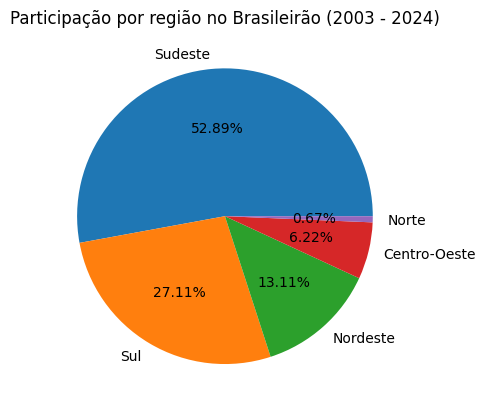

In [ ]:
sudeste = ['ES', 'RJ', 'SP', 'MG']
sul = ['RS', 'SC', 'PR']
centro_oeste = ['DF', 'GO', 'MT', 'MS']
nordeste = ['BA', 'SE', 'AL', 'PE', 'PB', 'RN', 'CE', 'MA', 'PI']
norte = ['AC', 'PA', 'RO', 'RR', 'AM', 'TO', 'AP']

#24 em 2003 e 2004, 22 em 2005 e 20 de 2006 em diante
total_times = 24 + 24 + 22 + (20 * 19)

estados = {}
for index, row in df.iterrows():
    if row['rodata'] == 1:
        if row['mandante_Estado'] in estados:
            estados[row['mandante_Estado']] += 1
        else:
            estados[row['mandante_Estado']] = 1
        if row['visitante_Estado'] in estados:
            estados[row['visitante_Estado']] += 1
        else:
            estados[row['visitante_Estado']] = 1

estados = dict(sorted(estados.items(), key = lambda x : x[1], reverse = True))

print('Contagem total e porcentagem de participações por estado no Brasileirao de 2003 até 2024: ')
for estado in estados.keys():
    print(f'{estado}: {estados[estado]} - {((estados[estado] / total_times)*100):.2f}%')

regioes = {'Sudeste' : 0, 'Sul' : 0, 'Nordeste' : 0, 'Centro-Oeste' : 0, 'Norte' : 0}
for estado in estados.keys():
    if estado in sudeste:
        regioes['Sudeste'] += estados[estado]
    elif estado in sul:
        regioes['Sul'] += estados[estado]
    elif estado in centro_oeste:
        regioes['Centro-Oeste'] += estados[estado]
    elif estado in nordeste:
        regioes['Nordeste'] += estados[estado]
    else:
        regioes['Norte'] += estados[estado]

print('\nContagem total e porcentagem de participações por região no Brasileirao de 2003 até 2024: ')
for regiao in regioes.keys():
    print(f'{regiao}: {((regioes[regiao] / total_times) * 100):.2f}%')

labels = regioes.keys()
sizes = list(regioes.values())

plt.title('Participação por região no Brasileirão (2003 - 2024)')
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.show()

# Artilheiros em geral e artilheiros por edição (de 2014 em diante, que é quando se tem os dados no dataset)

Artilheiros somando-se as edições de 2014 a 2024:
Gabriel Barbosa tem 101 gols
Fred tem 81 gols
Diego Souza tem 80 gols
Luciano da Rocha Neves tem 75 gols
Pedro tem 72 gols
Bruno Henrique tem 66 gols
Eduardo Sasha tem 59 gols
Giorgian De Arrascaeta tem 59 gols
Willian Gomes de Siqueira tem 56 gols
Eduardo Pereira Rodrigues tem 56 gols
Ricardo Oliveira tem 56 gols
Gilberto Oliveira Souza Junior tem 56 gols
Hulk tem 56 gols
Germán Cano tem 54 gols
Yuri Alberto tem 53 gols
Wellington Paulista tem 49 gols
Mário Sérgio Santos Costa tem 49 gols
Pablo Felipe Teixeira tem 48 gols
Rafael Moura tem 46 gols
Thiago Galhardo tem 46 gols
Raphael Cavalcante Veiga tem 46 gols
Deyverson tem 46 gols
Paolo Guerrero tem 45 gols
André Felipe Ribeiro de Souza tem 44 gols
Henrique Dourado tem 43 gols
Paulinho tem 42 gols
Róger Guedes tem 42 gols
Everaldo Stum tem 41 gols
Keno tem 41 gols
Yago Pikachu tem 41 gols
Jonathan Calleri tem 40 gols
Rony tem 39 gols
Vinícius tem 38 gols
Gustavo Scarpa tem 37 gols
Nen

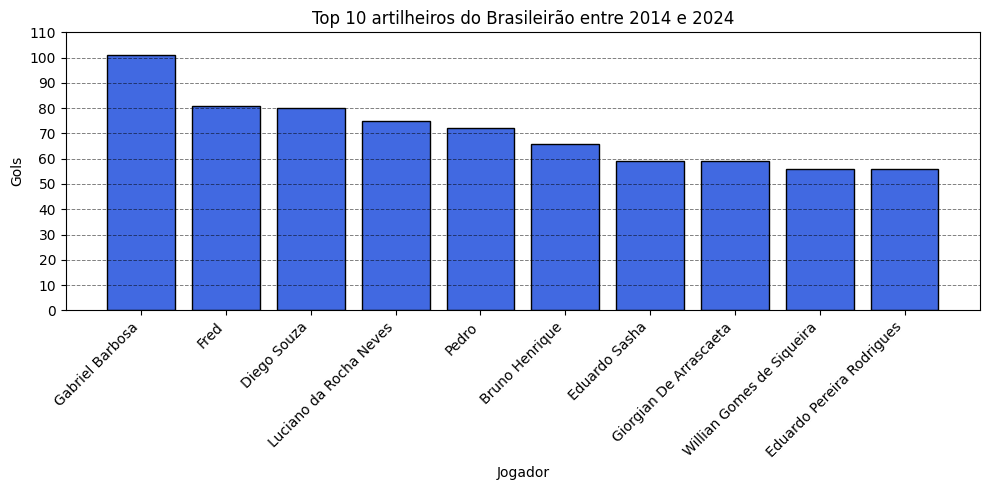


Top 5 artilheiros da edição 2014:
  Fred: 18 gols
  Henrique Dourado: 16 gols
  Marcelo Moreno: 15 gols
  Ricardo Goulart: 15 gols
  Hernán Barcos: 14 gols

Top 5 artilheiros da edição 2015:
  Ricardo Oliveira: 20 gols
  Fred: 15 gols
  Vágner Love: 14 gols
  Lucas Pratto: 13 gols
  Jadson: 13 gols

Top 5 artilheiros da edição 2016:
  Fred: 16 gols
  Diego Souza: 14 gols
  William Pottker: 14 gols
  Grafite: 13 gols
  Gabriel Jesus: 12 gols

Top 5 artilheiros da edição 2017:
  Jô: 18 gols
  Henrique Dourado: 18 gols
  André Felipe Ribeiro de Souza: 16 gols
  Lucca Borges de Brito: 13 gols
  Fred: 13 gols

Top 5 artilheiros da edição 2018:
  Gabriel Barbosa: 18 gols
  Ricardo Oliveira: 13 gols
  Pablo Felipe Teixeira: 12 gols
  Diego Souza: 12 gols
  Nicolás Federico López: 11 gols

Top 5 artilheiros da edição 2019:
  Gabriel Barbosa: 25 gols
  Bruno Henrique: 21 gols
  Eduardo Sasha: 14 gols
  Gilberto Oliveira Souza Junior: 14 gols
  Everaldo Stum: 13 gols

Top 5 artilheiros da ediçã

In [48]:
df_gols = pd.read_csv(r"archive/campeonato-brasileiro-gols.csv", sep=',')
#artilheiros entre 2014 e 2024
artilheiros = {}
for _, row in df_gols.iterrows():
    if row['tipo_de_gol'] != 'Gol Contra':
        if row['atleta'] in artilheiros:
            artilheiros[row['atleta']] += 1
        else:
            artilheiros[row['atleta']] = 1
artilheiros = dict(sorted(artilheiros.items(), key = lambda x : x[1], reverse = True))

print('Artilheiros somando-se as edições de 2014 a 2024:')
for jogador in artilheiros:
    print(f'{jogador} tem {artilheiros[jogador]} gols')

#Top 10 artilheiros do brasileirao de 2014 a 2024
top_10_artilheiros = list(artilheiros.items())[:10]
nomes = [atleta for atleta, gols in top_10_artilheiros]
gols = [gol for atleta, gol in top_10_artilheiros]

plt.figure(figsize=(10,5))
bars = plt.bar(nomes, gols, color='royalblue', edgecolor='black', align='center')
plt.xlabel('Jogador')
plt.ylabel('Gols')
plt.title('Top 10 artilheiros do Brasileirão entre 2014 e 2024')
plt.xticks(ticks=range(len(nomes)), labels=nomes, rotation=45, ha='right')
yticks = range(0, max(gols)+10, 10)
plt.yticks(yticks)

for y in yticks:
    plt.axhline(y=y, color='black', linestyle='dashed', linewidth=0.7, alpha=0.5)

plt.tight_layout()
plt.show()

#adicionado a coluna edicao em df_gol
id_para_edicao = df.set_index('ID')['edicao'].to_dict()
df_gols['edicao'] = df_gols['partida_id'].map(id_para_edicao)

#artilheiros por edicao
artilheiros_por_edicao = {}
for _, row in df_gols.iterrows():
    if row['edicao'] not in artilheiros_por_edicao:
        artilheiros_por_edicao[row['edicao']] = {}
    if row['atleta'] in artilheiros_por_edicao[row['edicao']]:
        artilheiros_por_edicao[row['edicao']][row['atleta']] += 1
    else:
        artilheiros_por_edicao[row['edicao']][row['atleta']] = 1

print()

for edicao in sorted(artilheiros_por_edicao.keys()):
    print(f"Top 5 artilheiros da edição {edicao}:")
    artilheiros = sorted(artilheiros_por_edicao[edicao].items(), key=lambda x: x[1], reverse=True)[:5]
    for atleta, gols in artilheiros:
        print(f"  {atleta}: {gols} gols")
    print()